<a href="https://colab.research.google.com/github/jeromechen99/MachineLearning/blob/master/sampling_and_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_style("white") # get rid of seaborn grid lines
%matplotlib inline
np.random.seed(20160410)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: bias and ddof have no effect and are deprecated
  del sys.path[0]


Correlation matrix:
 [[ 1.         -0.29396167]
 [-0.29396167  1.        ]]


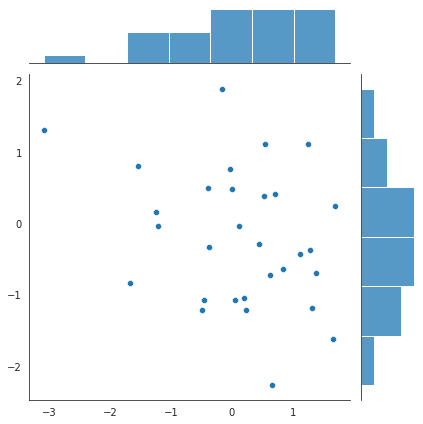

In [3]:
# generate bivariate normal data for uncorrelated variables
# See the docs on scipy.stats.multivariate_normal

# bivariate mean
mean = [0,0]  

# covariance matrix
cov = np.array([[1,0],
                [0,1]])

sample = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=30)
sbn.jointplot(sample[:,0], sample[:,1])
print("Correlation matrix:\n", np.corrcoef(sample, rowvar=False, ddof=1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: bias and ddof have no effect and are deprecated
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: bias and ddof have no effect and are deprecated
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.war

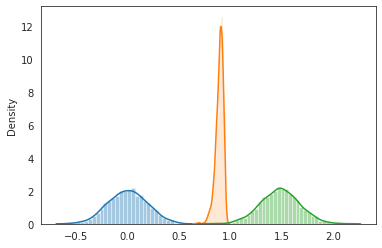

In [4]:
mean = [0,0]
cov = [[1,0],
       [0,1]]
ssize = 30
nsims = 2500

cors = []
for n in range(nsims):
    sample = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=ssize)
    r = np.corrcoef(sample, rowvar=False, ddof=1)[0,1]
    cors.append(r)
sbn.distplot(cors)
pass

mean = [0,0]
cov = [[1,0.9],
       [0.9,1]]
ssize = 30
nsims = 2500

cors090 = []
for n in range(nsims):
    sample = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=ssize)
    r = np.corrcoef(sample, rowvar=False, ddof=1)[0,1]
    cors090.append(r)
    
sbn.distplot(cors090)
pass

# plot for sampling distribution when pho = 0.9
# using Fisher's transformation
sbn.distplot(np.arctanh(cors090))
print("")
pass

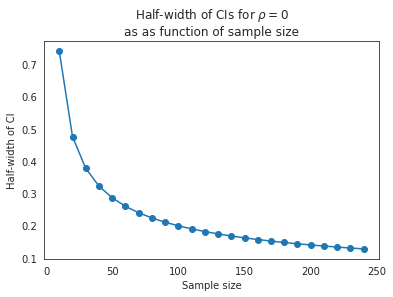

In [5]:
def correlationCI(r, n, alpha=0.05):
    mu = np.arctanh(r)
    sigma = 1.0/np.sqrt(n-3)
    z = stats.norm.ppf(alpha/2)
    left = np.tanh(mu) - z*sigma
    right = np.tanh(mu) + z*sigma
    return (left, right)
correlationCI(0, 30)

ssizes = np.arange(10,250,step=10)
cis = []
for i in ssizes:
    cis.append(correlationCI(0, i)[0])

plt.plot(ssizes, cis, '-o')
plt.xlabel("Sample size")
plt.ylabel("Half-width of CI")
plt.title(r"""Half-width of CIs for $\rho=0$
as as function of sample size""")


pass



In [6]:
stats.pearsonr(sample[:,0], sample[:,1])
?stats.pearsonr

Pearson r:  0.9118626002576455
Spearman's rho:  0.903577430972389
Kendall's tau:  0.746938775510204
Pearson r:  0.7854846671330055
Spearman's rho:  0.8206266541449672
Kendall's tau:  0.6726998491704375


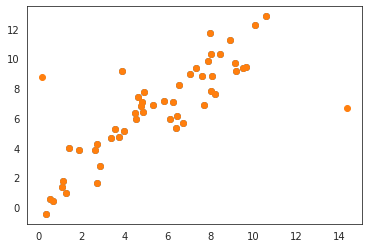

In [7]:
n = 50
x = np.linspace(1,10,n) + stats.norm.rvs(size=n)
y = x + stats.norm.rvs(loc=1, scale=1.5, size=n)
plt.scatter(x,y)

print("Pearson r: ", stats.pearsonr(x, y)[0])
print("Spearman's rho: ", stats.spearmanr(x, y)[0])
print("Kendall's tau: ", stats.kendalltau(x, y)[0])

pass

pollute_X = np.concatenate([x, stats.norm.rvs(loc=14, size=1), stats.norm.rvs(loc=-1, size=1)])
pollute_Y = np.concatenate([y, stats.norm.rvs(loc=6, size=1), stats.norm.rvs(loc=8, size=1)])

plt.scatter(pollute_X, pollute_Y)

print("Pearson r: ", stats.pearsonr(pollute_X, pollute_Y)[0])
print("Spearman's rho: ", stats.spearmanr(pollute_X,pollute_Y)[0])
print("Kendall's tau: ", stats.kendalltau(pollute_X,pollute_Y)[0])

source: https://notebook.community/Bio204-class/bio204-notebooks/2016-04-11-Sampling-Distribution-Correlation-Coefficient